In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [128]:
df = pd.read_csv('data/stud.csv')

In [129]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [130]:
# df['avg_score']=(df['math_score']+df['reading_score']+df['writing_score'])/3

In [131]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [132]:
X = df.drop(columns=['math_score'],axis=1)


In [133]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [135]:
y=df['math_score']

In [136]:
type(y)

pandas.core.series.Series

In [137]:
num_feature = [f for f in X.columns if X[f].dtype!='O']

In [138]:
type(num_feature)

list

In [139]:
cat_features = X.select_dtypes(include="object").columns

In [140]:
type(cat_features)

pandas.core.indexes.base.Index

In [141]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# jab sari binary classification hoti hai to label encoding
# jab jayada categeroy hoti hai feature main to ->label EncodingWarning
# jab kam category hoti hai to one hot encoder

In [142]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')


In [143]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Sample y values:\n", y.head())

# Check for target leakage
print("Any y present in X columns:", any(X.columns.str.lower().str.contains("target")))


X shape: (1000, 7)
y shape: (1000,)
Sample y values:
 0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64
Any y present in X columns: False


In [144]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",cat_transformer,cat_features),
        ("StandardScaler",num_transformer,num_feature)
    ]
)

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

In [146]:
X_train = preprocessor.fit_transform(X_train)

In [147]:
X_test = preprocessor.transform(X_test)

In [148]:
def evaluate_model(true , predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [149]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list = []

model_Objects = list(models.values())
model_names =list(models.keys())
i=0
# model_names
for model in  model_Objects:
    model.fit(X_train,y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

     # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(model_names[i])
    model_list.append(model_names[i])
    i+=1
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3240
- Mean Absolute Error: 4.2697
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3739
- Mean Absolute Error: 4.2011
- R2 Score: 0.8813


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5925
- Mean Absolute Error: 5.2053
- R2 Score: 0.8072
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5173
- Mean Absolute Error: 5.1557
- R2 Score: 0.8254


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6948
- Mean Absolute Error: 4.5012
- R2 Score: 0.8562
-----------------------

In [150]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.881322
2,Ridge,0.880592
8,AdaBoost Regressor,0.851925
7,CatBoosting Regressor,0.851831
5,Random Forest Regressor,0.849319
6,XGBRegressor,0.827797
1,Lasso,0.825446
3,K-Neighbors Regressor,0.786260
4,Decision Tree,0.749690


In [151]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.13


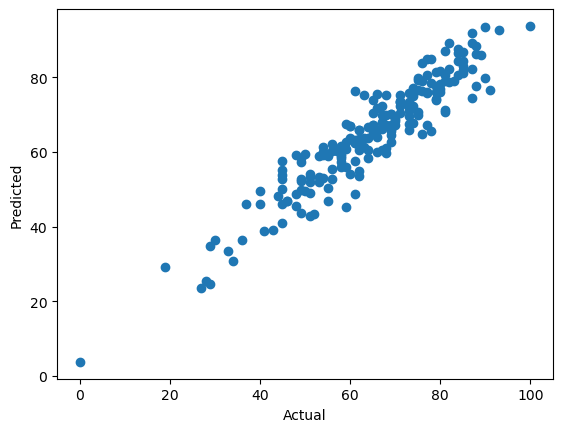

In [152]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [153]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [154]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.519531,14.480469
737,53,58.832031,-5.832031
740,80,76.988281,3.011719
660,74,77.031250,-3.031250
411,84,87.625000,-3.625000
...,...,...,...
408,52,43.351562,8.648438
332,62,62.074219,-0.074219
208,74,67.863281,6.136719
613,65,67.128906,-2.128906
